<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Interpolacion/Interpolacion_CubicSplines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Librerias
import numpy as np
import sympy as sp
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from numpy.linalg import solve

# Interpolación por Splines Cúbicos

---

### Profesor: Juan Marcos Marín

---


La interpolación por splines cúbicos es una técnica utilizada para encontrar una curva suave que pase por un conjunto de puntos dados. El spline cúbico es un conjunto de funciones polinómicas de tercer grado que están conectadas de manera suave en los puntos de control o nodos, garantizando continuidad en las primeras y segundas derivadas.

Para un conjunto de puntos $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$, el spline cúbico es una función $S(x)$, compuesta por un conjunto de polinomios cúbicos $S_i(x)$ definidos en los intervalos $[x_i, x_{i+1}]$, de la siguiente forma:

$$
S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3
$$

donde $S_i(x)$ es el polinomio cúbico en el intervalo $[x_i, x_{i+1}]$, y los coeficientes $a_i, b_i, c_i, d_i$ son determinados mediante condiciones de continuidad y derivabilidad.



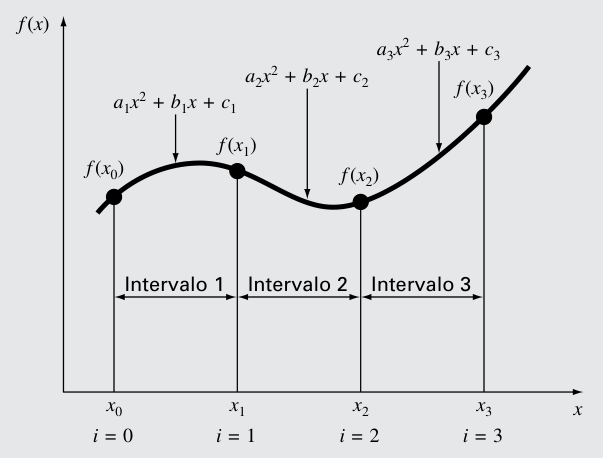


## Condiciones del Spline Cúbico

Para garantizar que los polinomios cúbicos formen una curva suave, deben cumplirse las siguientes condiciones:

1. **Condición de Interpolación**: Los splines deben pasar por todos los puntos dados:
   $$
   S_i(x_i) = y_i \quad \text{y} \quad S_i(x_{i+1}) = y_{i+1}
   $$

2. **Continuidad de la primera derivada**: Las derivadas primeras deben ser continuas en cada nodo:
   $$
   S_i'(x_{i+1}) = S_{i+1}'(x_{i+1}) \quad \text{para} \quad i = 0, 1, \dots, n-1
   $$

3. **Continuidad de la segunda derivada**: Las derivadas segundas también deben ser continuas:
   $$
   S_i''(x_{i+1}) = S_{i+1}''(x_{i+1}) \quad \text{para} \quad i = 0, 1, \dots, n-1
   $$

4. **Condición de frontera**: Existen diferentes formas de imponer condiciones en los extremos. Las más comunes son:
   - **Spline natural**: Se impone que las segundas derivadas en los extremos son cero:
     $$
     S_0''(x_0) = 0 \quad \text{y} \quad S_{n-1}''(x_n) = 0
     $$
   - **Spline clamped (o con pendiente especificada)**: Se especifican las pendientes en los extremos:
     $$
     S_0'(x_0) = m_0 \quad \text{y} \quad S_{n-1}'(x_n) = m_n
     $$

## Derivada Primera

La derivada primera de $S_i(x)$ es:

$$
S_i'(x) = b_i + 2c_i (x - x_i) + 3d_i (x - x_i)^2
$$

## Derivada Segunda

La derivada segunda de $S_i(x)$ es:

$$
S_i''(x) = 2c_i + 6d_i (x - x_i)
$$



# Ejemplo de Interpolación por Splines Cúbicos con 3 Puntos

Supongamos que tenemos los siguientes tres puntos:

$$
(x_0, y_0) = (1, 2), \quad (x_1, y_1) = (2, 3), \quad (x_2, y_2) = (3, 5)
$$

Vamos a encontrar el spline cúbico que interpola estos puntos.

## Paso 1: Definir las ecuaciones cúbicas

Queremos encontrar dos polinomios cúbicos, $S_0(x)$ para el intervalo $[x_0, x_1]$ y $S_1(x)$ para el intervalo $[x_1, x_2]$, de la forma:

$$
S_0(x) = a_0 + b_0 (x - x_0) + c_0 (x - x_0)^2 + d_0 (x - x_0)^3
$$

$$
S_1(x) = a_1 + b_1 (x - x_1) + c_1 (x - x_1)^2 + d_1 (x - x_1)^3
$$

## Paso 2: Condiciones de interpolación

Se imponen las condiciones de interpolación, es decir, los splines deben pasar por los puntos dados:

1. En $x_0 = 1$, $S_0(x_0) = y_0 = 2$:
   $$
   a_0 = 2
   $$

2. En $x_1 = 2$, $S_0(x_1) = y_1 = 3$ y $S_1(x_1) = y_1 = 3$:
   $$
   a_0 + b_0 h_0 + c_0 h_0^2 + d_0 h_0^3 = 3 \quad (h_0 = 1)
   $$
   $$
   a_1 = 3
   $$

3. En $x_2 = 3$, $S_1(x_2) = y_2 = 5$:
   $$
   a_1 + b_1 h_1 + c_1 h_1^2 + d_1 h_1^3 = 5 \quad (h_1 = 1)
   $$

En el contexto de la interpolación por splines cúbicos, $h_i$ representa el tamaño del intervalo entre dos puntos consecutivos en el eje $x$. Específicamente, para un conjunto de puntos $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$, se define:

$$
h_i = x_{i+1} - x_i
$$

Dado el conjunto de puntos:

$$
(x_0, y_0) = (1, 2), \quad (x_1, y_1) = (2, 3), \quad (x_2, y_2) = (3, 5)
$$

Los valores de $h_0$ y $h_1$ son:

- $h_0 = x_1 - x_0 = 2 - 1 = 1$
- $h_1 = x_2 - x_1 = 3 - 2 = 1$

## Paso 3: Continuidad de las derivadas

1. **Primera derivada en $x_1$**: Las primeras derivadas de los splines deben coincidir en $x_1$:
   $$
   b_0 + 2c_0 h_0 + 3d_0 h_0^2 = b_1
   $$

2. **Segunda derivada en $x_1$**: Las segundas derivadas también deben coincidir en $x_1$:
   $$
   2c_0 + 6d_0 h_0 = 2c_1
   $$

## Paso 4: Condición de frontera (Spline natural)

Para un **spline natural**, se impone que las segundas derivadas en los extremos son cero:

1. En $x_0 = 1$, $S_0''(x_0) = 0$:
   $$
   2c_0 = 0 \quad \Rightarrow \quad c_0 = 0
   $$

2. En $x_2 = 3$, $S_1''(x_2) = 0$:
   $$
   2c_1 + 6d_1 h_1 = 0 \quad \Rightarrow \quad c_1 + 3d_1 = 0 \quad \Rightarrow \quad c_1 = -3d_1
   $$


## Paso 5: Sistema de ecuaciones

Ahora tenemos un sistema de ecuaciones con los coeficientes desconocidos $b_0, b_1, d_0, d_1$. Vamos a resolverlo:

1. De $S_0(x_1) = 3$:
   $$
   2 + b_0 + d_0 = 3 \quad \Rightarrow \quad b_0 + d_0 = 1 \quad (1)
   $$

2. De $S_1(x_2) = 5$:
   $$
   3 + b_1 -3d_1 + d_1 = 5 \quad \Rightarrow \quad b_1 - 2 d_1 = 2 \quad (2)
   $$

3. De la continuidad de la primera derivada:
   $$
   b_0 - b_1 + 3d_0 =  \quad (3)
   $$

4. De la continuidad de la segunda derivada:
   $$
   6d_0 = -6d_1 \quad \Rightarrow \quad d_0 + d_1 = 0 \quad (4)
   $$

## Sistema de ecuaciones a resolver

$$
\begin{pmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & -2 \\
1 & -1 & 3 & 0 \\
0 & 0 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
b_0 \\
b_1 \\
d_0 \\
d_1
\end{pmatrix}
=
\begin{pmatrix}
1 \\
2 \\
0 \\
0
\end{pmatrix}
$$

### Solución
* $a_0 = 2$
* $a_1 = 3$
* $b_0 = 0.75$
* $b_1 = 1.5$
* $c_0 = 0$
* $c_1 = -0.75$
* $d_0 = 0.25$
* $d_1 = -0.25$
## Paso 6: Splines resultantes

Finalmente, los splines cúbicos son:

- Para $S_0(x)$ en el intervalo $[1, 2]$:
  $$
  S_0(x) = 0.25 x^{3} - 0.75 x^{2} + 1.5 x + 1.0
  $$

- Para $S_1(x)$ en el intervalo $[2, 3]$:
  $$
  S_1(x) = - 0.25 x^{3} + 2.25 x^{2} - 4.5 x + 5.0
  $$

Estos polinomios interpolan los puntos dados de manera suave.


In [3]:
x_points = np.array([1, 2, 3])
y_points = np.array([2, 3, 5])

In [4]:
# Matriz asociada al sistema de ecuaciones
A = np.array([             # El orden de las filas es b0 d0 b1 c1 d1
	[1, 0, 1, 0],
	[0, 1, 0, -2],
	[1, -1, 3, 0],
	[0, 0, 1, 1]])
b = np.array([1, 2, 0, 0])

In [5]:
# Resolvemos el sistema de ecuaciones asociado
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, b1, d0, d1 = sol
sol

array([ 0.75,  1.5 ,  0.25, -0.25])

In [6]:
# Constantes
a0 = 2
a1 = 3
c0 = 0
c1 = -3*d1

In [7]:
# Veamos los polinomios de interpolación S_0(x)
x = sp.symbols('x')
x0, x1 = 1, 2
S0 = a0 + b0*(x-x0) + c0*(x-x0)**2 + d0*(x-x0)**3
sp.expand(S0)

0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

In [8]:
# Veamos los polinomios de interpolación S_1(x)
S1 = a1 + b1*(x-x1) + c1*(x-x1)**2 + d1*(x-x1)**3
sp.expand(S1)

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

In [9]:
# Como funciones 'numpy' para graficación
S0 = sp.lambdify(x, S0)
S1 = sp.lambdify(x, S1)

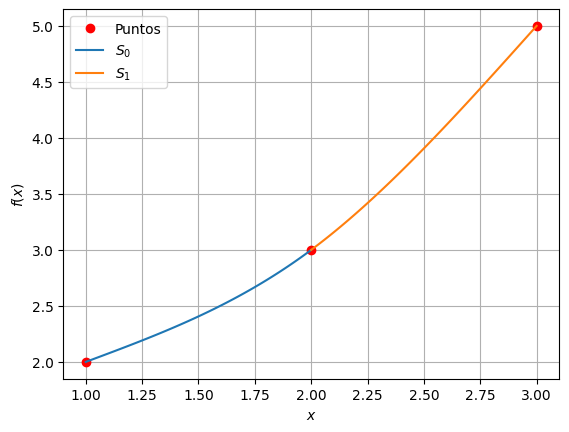

In [10]:
x_0 = np.linspace(x_points[0], x_points[1], 100)
x_1 = np.linspace(x_points[1], x_points[2], 100)

plt.plot(x_points, y_points, 'ro', label = 'Puntos')
plt.plot(x_0, S0(x_0), label='$S_0$')
plt.plot(x_1, S1(x_1), label='$S_1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

# Método para CubicSpline

Podemos usar de `scipy.interpolate` el método `CubicSpline` para encontrar la interpolación


```python
from scipy.interpolate import CubicSpline
```



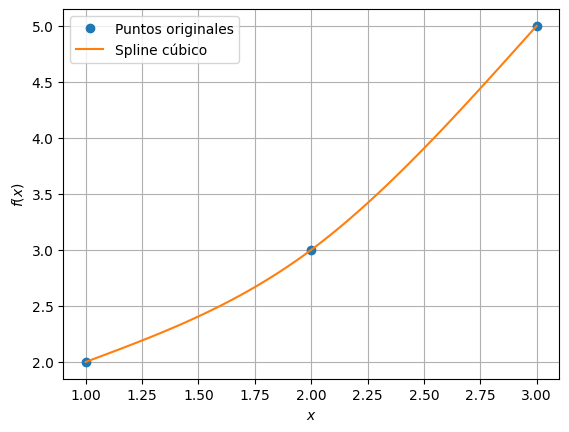

In [11]:
from scipy.interpolate import CubicSpline
# Definir los puntos conocidos
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

# Crear el spline cúbico
cs = CubicSpline(x, y, bc_type='natural')

# Definir nuevos puntos donde interpolar
x_new = np.linspace(min(x), max(x), 100)
y_new = cs(x_new)

# Graficar los puntos originales y la curva interpolada
plt.plot(x, y, 'o', label='Puntos originales')
plt.plot(x_new, y_new, label='Spline cúbico')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

## Splines de orden inferior

Si quisieramos aproximar el polinomio $S_i(x)$ a un grado inferior, esto es, $n = 0, 1, 2$ podemos usar la función `interp1d` cambiando el tipo con `kind`, para:
* $n = 0$ (`kind= zero`)
* $n = 1$ (`kind= slinear`)
* $n = 2$ (`kind= quadratic`)

In [13]:
from scipy.interpolate import interp1d

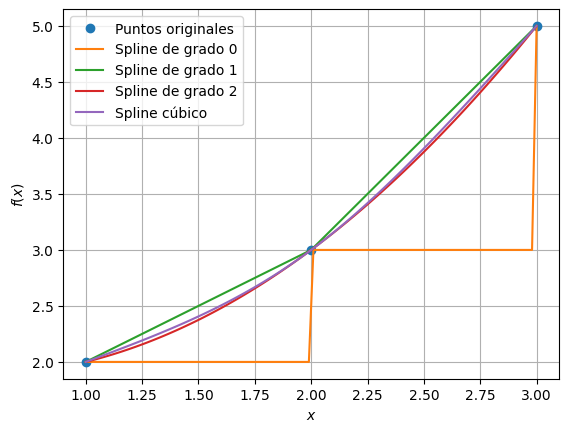

In [19]:
# Definir los puntos conocidos
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

# Polinomios de interpolacion
fs_zero = interp1d(x, y, kind='zero')
fs_lineal = interp1d(x, y, kind='linear')
fs_cuadratica = interp1d(x, y, kind='quadratic')
fs_cubic = CubicSpline(x, y, bc_type='natural')

# Grafico

x_interp = np.linspace(min(x), max(x), 100)

plt.plot(x, y, 'o', label='Puntos originales')
plt.plot(x_interp, fs_zero(x_interp), label='Spline de grado 0')
plt.plot(x_interp, fs_lineal(x_interp), label='Spline de grado 1')
plt.plot(x_interp, fs_cuadratica(x_interp), label='Spline de grado 2')
plt.plot(x_interp, fs_cubic(x_interp), label='Spline cúbico')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()